In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine

In [9]:
X, y = load_wine(return_X_y= True, as_frame=True)
df_raw = X
df_raw["target"] = y
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [11]:
df_interim = df_raw.copy()
df = (
    df_interim
    .copy()
    .reindex(
        columns=(
            ['target'] + 
            [c for c in df_interim.columns.to_list() if c not in ['target']]
        )
    )
)
df_raw = df_raw.rename(columns= {'od280/od315_of_diluted_wines': 'od_diluted'})
df_interim

df = df_interim[['target']].copy()
df = pd.concat([df,df_interim.drop(['target'], axis= 1)],axis = 1)
df['target'] = df['target'].astype('category')
df.sample(10)

target  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
173      2    13.71        5.65  2.45               20.5       95.0   
112      1    11.76        2.68  2.92               20.0      103.0   
107      1    12.72        1.75  2.28               22.5       84.0   
48       0    14.10        2.02  2.40               18.8      103.0   
54       0    13.74        1.67  2.25               16.4      118.0   
101      1    12.60        1.34  1.90               18.5       88.0   
155      2    13.17        5.19  2.32               22.0       93.0   
9        0    13.86        1.35  2.27               16.0       98.0   
175      2    13.27        4.28  2.26               20.0      120.0   
158      2    14.34        1.68  2.70               25.0       98.0   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
173           1.68        0.61                  0.52             1.06   
112           1.75        2.03                  0.60             1.05   
107           1.38        1.76                  0.48             1.63   
48            2.75        2.92                  0.32             2.38   
54            2.60        2.90                  0.21             1.62   
101           1.45        1.36                  0.29             1.35   
155           1.74        0.63                  0.61             1.55   
9             2.98        3.15                  0.22             1.85   
175           1.59        0.69                  0.43             1.35   
158           2.80        1.31                  0.53             2.70   

     color_intensity   hue  od_diluted  proline  
173             7.70  0.64        1.74    740.0  
112             3.80  1.23        2.50    607.0  
107             3.30  0.88        2.42    488.0  
48              6.20  1.07        2.75   1060.0  
54              5.85  0.92        3.20   1060.0  
101             2.45  1.04        2.77    562.0  
155             7.90  0.60        1.48    725.0  
9               7.22  1.01        3.55   1045.0  
175            10.20  0.59        1.56    835.0  
158            13.00  0.57        1.96    660.0

In [15]:
# EDA 
df_train, df_test = train_test_split(df, test_size=0.2, stratify= df['target'], random_state=2024)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 39 to 6
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   target                142 non-null    category
 1   alcohol               142 non-null    float64 
 2   malic_acid            142 non-null    float64 
 3   ash                   142 non-null    float64 
 4   alcalinity_of_ash     142 non-null    float64 
 5   magnesium             142 non-null    float64 
 6   total_phenols         142 non-null    float64 
 7   flavanoids            142 non-null    float64 
 8   nonflavanoid_phenols  142 non-null    float64 
 9   proanthocyanins       142 non-null    float64 
 10  color_intensity       142 non-null    float64 
 11  hue                   142 non-null    float64 
 12  od_diluted            142 non-null    float64 
 13  proline               142 non-null    float64 
dtypes: category(1), float64(13)
memory usage: 15.8 KB


In [13]:
display(df_train.describe(include= 'number').T)
display(df_train.describe(include= 'category').T)

count        mean         std     min       25%  \
alcohol               142.0   13.020845    0.820986   11.03   12.3450   
malic_acid            142.0    2.303099    1.103127    0.74    1.5400   
ash                   142.0    2.377606    0.272854    1.70    2.2225   
alcalinity_of_ash     142.0   19.652113    3.389025   11.40   17.1250   
magnesium             142.0  100.978873   14.747746   70.00   89.0000   
total_phenols         142.0    2.322394    0.649696    0.98    1.7050   
flavanoids            142.0    2.064155    1.004367    0.34    1.2500   
nonflavanoid_phenols  142.0    0.354225    0.119219    0.13    0.2600   
proanthocyanins       142.0    1.608380    0.577259    0.42    1.2500   
color_intensity       142.0    5.044155    2.299338    1.74    3.1025   
hue                   142.0    0.962930    0.229242    0.48    0.7925   
od_diluted            142.0    2.624085    0.700862    1.27    2.0200   
proline               142.0  739.098592  324.248532  278.00  483.7500   

                          50%       75%      max  
alcohol                13.050   13.7175    14.75  
malic_acid              1.845    3.0300     5.80  
ash                     2.365    2.5800     3.23  
alcalinity_of_ash      19.500   21.5000    30.00  
magnesium              98.000  109.5000   162.00  
total_phenols           2.415    2.8450     3.88  
flavanoids              2.170    2.8975     5.08  
nonflavanoid_phenols    0.340    0.4300     0.66  
proanthocyanins         1.560    1.9700     3.58  
color_intensity         4.800    6.2375    13.00  
hue                     0.960    1.1200     1.71  
od_diluted              2.795    3.1875     4.00  
proline               650.000  981.2500  1680.00

count  unique  top  freq
target    142       3    1    57

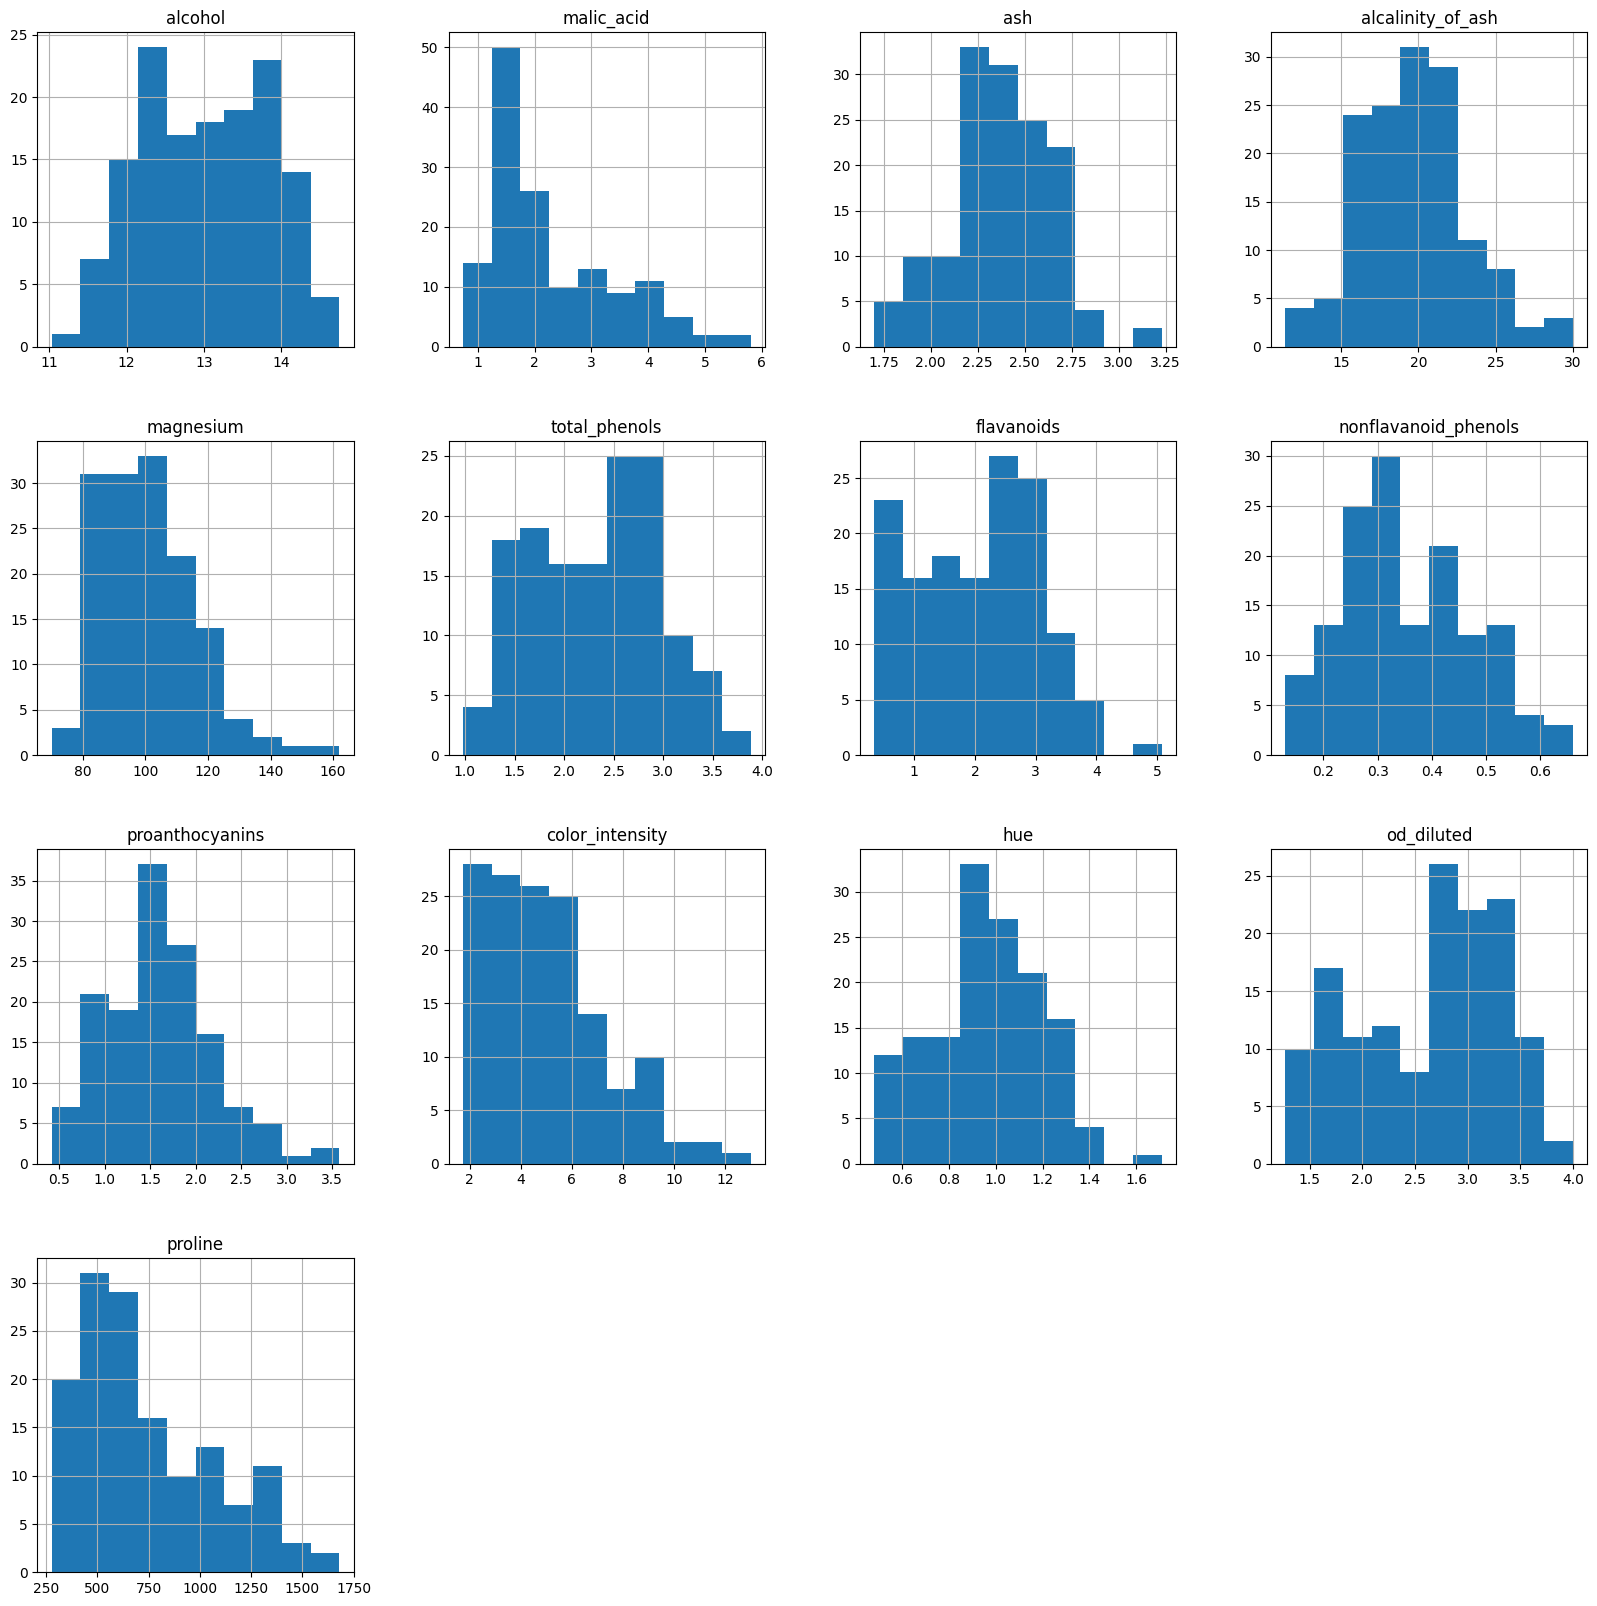

In [14]:
df_train.hist(figsize=(20, 20))
plt.show()

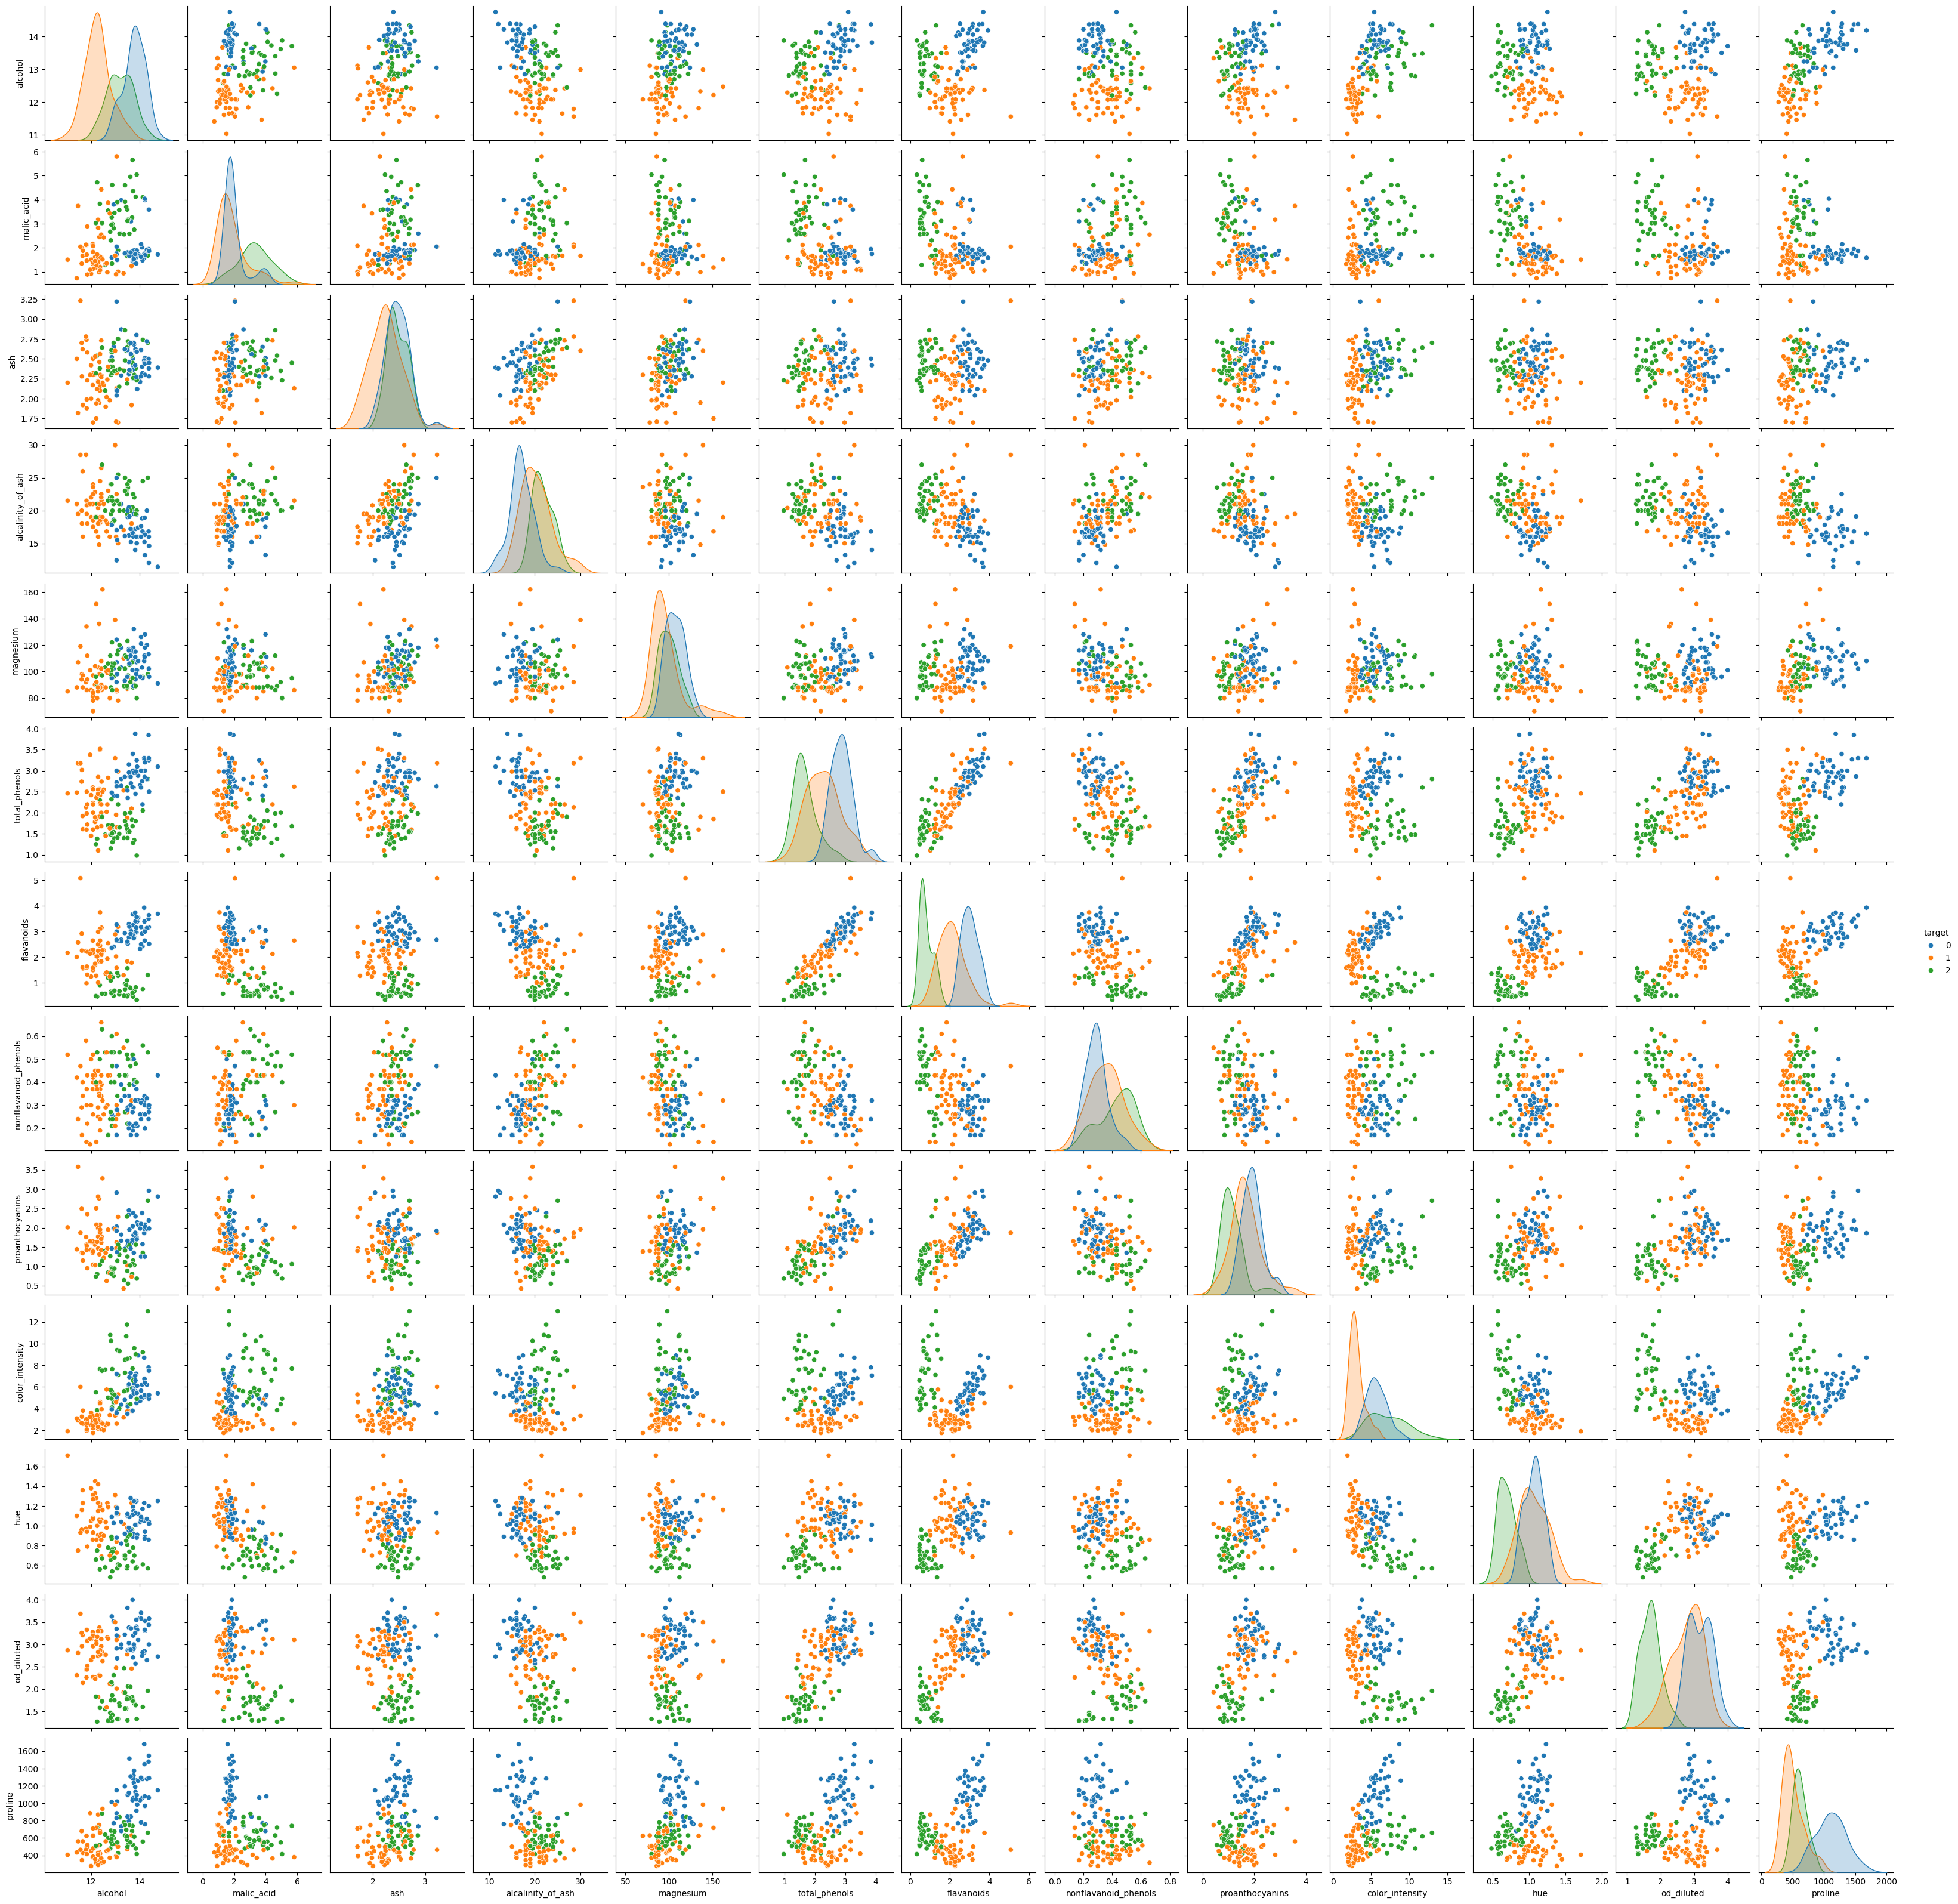

In [17]:
sns.pairplot(data=df_train, hue='target')
plt.show()

In [18]:
df_train.select_dtypes('number').corr()

alcohol  malic_acid       ash  alcalinity_of_ash  \
alcohol               1.000000    0.166939  0.234295          -0.334611   
malic_acid            0.166939    1.000000  0.167944           0.248653   
ash                   0.234295    0.167944  1.000000           0.447038   
alcalinity_of_ash    -0.334611    0.248653  0.447038           1.000000   
magnesium             0.243273   -0.067136  0.272855          -0.059022   
total_phenols         0.276623   -0.347914  0.103680          -0.344496   
flavanoids            0.221056   -0.434193  0.062500          -0.402219   
nonflavanoid_phenols -0.117777    0.299596  0.208177           0.408865   
proanthocyanins       0.097577   -0.303047 -0.065531          -0.282282   
color_intensity       0.586175    0.229474  0.291527           0.008760   
hue                  -0.125875   -0.546009 -0.125191          -0.284579   
od_diluted            0.070410   -0.391151 -0.015581          -0.326397   
proline               0.666671   -0.201965  0.249667          -0.434226   

                      magnesium  total_phenols  flavanoids  \
alcohol                0.243273       0.276623    0.221056   
malic_acid            -0.067136      -0.347914   -0.434193   
ash                    0.272855       0.103680    0.062500   
alcalinity_of_ash     -0.059022      -0.344496   -0.402219   
magnesium              1.000000       0.201671    0.188269   
total_phenols          0.201671       1.000000    0.865697   
flavanoids             0.188269       0.865697    1.000000   
nonflavanoid_phenols  -0.278076      -0.393234   -0.487806   
proanthocyanins        0.247569       0.615694    0.643597   
color_intensity        0.173244       0.004083   -0.105922   
hue                    0.044349       0.410348    0.514814   
od_diluted             0.066710       0.696422    0.764028   
proline                0.381851       0.501623    0.493808   

                      nonflavanoid_phenols  proanthocyanins  color_intensity  \
alcohol                          -0.117777         0.097577         0.586175   
malic_acid                        0.299596        -0.303047         0.229474   
ash                               0.208177        -0.065531         0.291527   
alcalinity_of_ash                 0.408865        -0.282282         0.008760   
magnesium                        -0.278076         0.247569         0.173244   
total_phenols                    -0.393234         0.615694         0.004083   
flavanoids                       -0.487806         0.643597        -0.105922   
nonflavanoid_phenols              1.000000        -0.341667         0.097008   
proanthocyanins                  -0.341667         1.000000        -0.003983   
color_intensity                   0.097008        -0.003983         1.000000   
hue                              -0.219471         0.330465        -0.488985   
od_diluted                       -0.422797         0.498635        -0.397318   
proline                          -0.302774         0.337199         0.358833   

                           hue  od_diluted   proline  
alcohol              -0.125875    0.070410  0.666671  
malic_acid           -0.546009   -0.391151 -0.201965  
ash                  -0.125191   -0.015581  0.249667  
alcalinity_of_ash    -0.284579   -0.326397 -0.434226  
magnesium             0.044349    0.066710  0.381851  
total_phenols         0.410348    0.696422  0.501623  
flavanoids            0.514814    0.764028  0.493808  
nonflavanoid_phenols -0.219471   -0.422797 -0.302774  
proanthocyanins       0.330465    0.498635  0.337199  
color_intensity      -0.488985   -0.397318  0.358833  
hue                   1.000000    0.561141  0.223663  
od_diluted            0.561141    1.000000  0.321511  
proline               0.223663    0.321511  1.000000

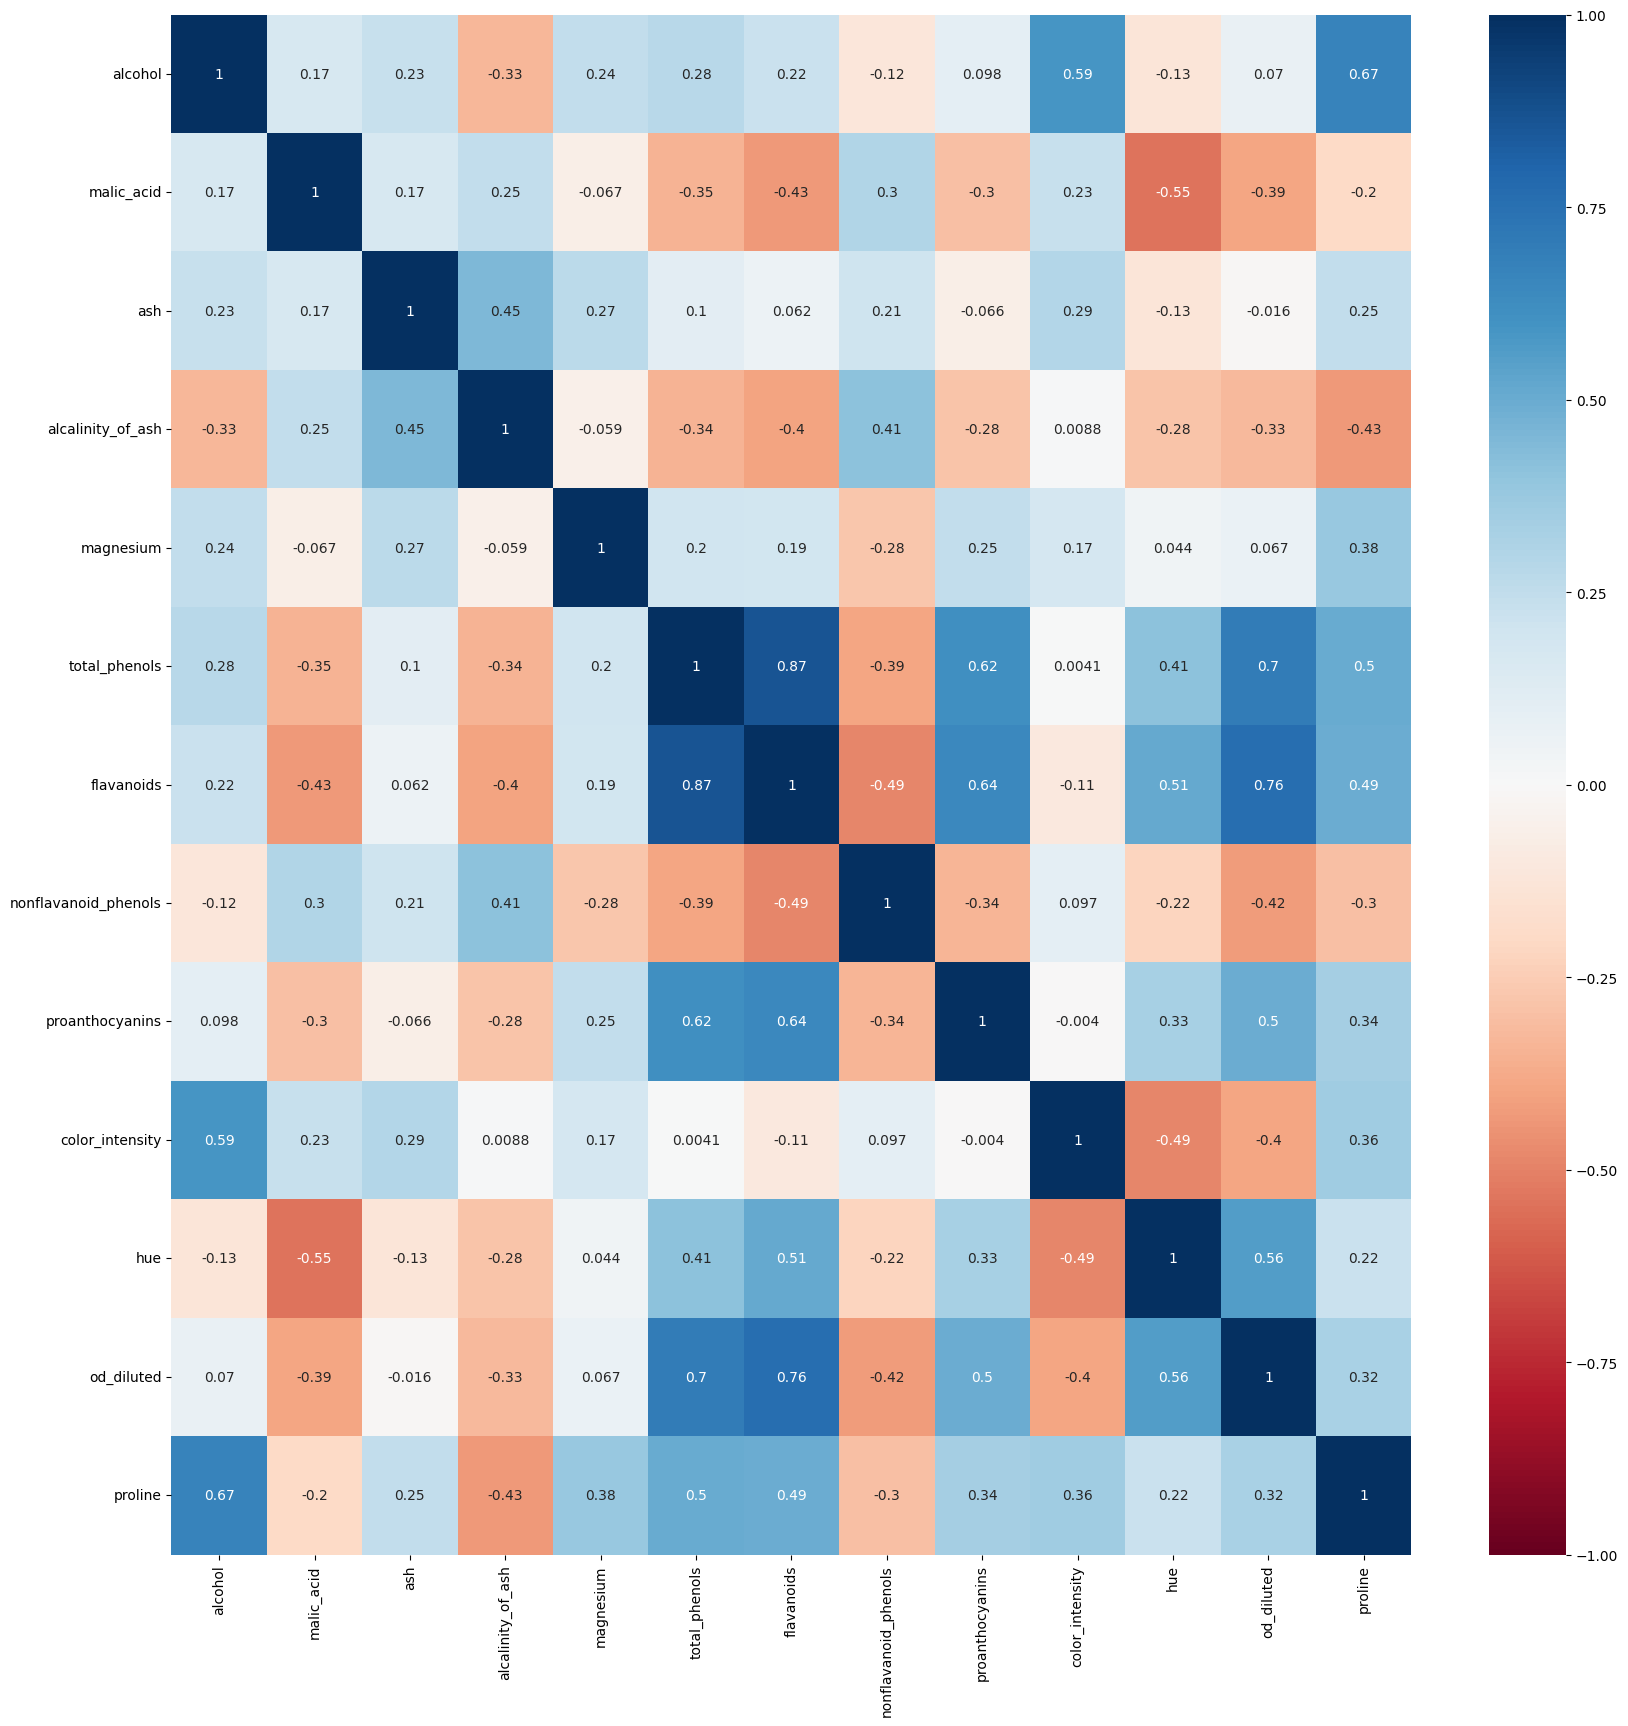

In [23]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_train.select_dtypes('number').corr(), vmin= -1, vmax= 1, annot= True, cmap="RdBu", ax=ax)
plt.show()

In [24]:
# Modelo de machine learning
X_train = df_train.drop('target', axis=1).reset_index(drop=True)
y_train = df_train['target'].reset_index(drop=True)
X_test = df_test.drop('target', axis=1).reset_index(drop=True)
y_test = df_test['target'].reset_index(drop=True)

In [25]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred = clf_nb.predict(X_test)

In [28]:
print(f'accuracy score: {accuracy_score(y_test, y_pred)}')

accuracy score: 1.0
